In [1]:
from helpers import loadData
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X, Y = loadData('winequality-red-1.csv')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
#Scale data
scaledData = StandardScaler()
X_train = scaledData.fit_transform(X_train)
X_test = scaledData.transform(X_test)

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Use GridSearchCV to test paramaters and find the best combo of hyperperameters

wine_SVM = SVC()
param_grid_svm = {
    'kernel': ['rbf','sigmoid','poly'], 
    'C': [1, 10, 20, 30, 40, 50, 75, 100, 500]
}

CV_svm = GridSearchCV(estimator=wine_SVM, param_grid=param_grid_svm) #automatically does 5 fold CV
CV_svm.fit(X_train, Y_train)

#print the result of best hyperparameters
print(CV_svm.best_params_)

{'C': 30, 'kernel': 'rbf'}


Accuracy: 0.6
Classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.31      0.44      0.36         9
           5       0.73      0.63      0.68       188
           6       0.54      0.61      0.58       150
           7       0.52      0.50      0.51        50
           8       0.00      0.00      0.00         1

    accuracy                           0.60       400
   macro avg       0.35      0.37      0.35       400
weighted avg       0.62      0.60      0.61       400



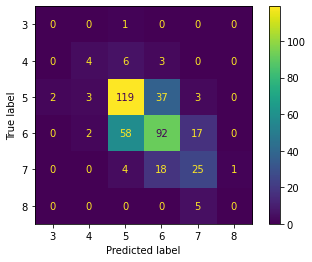

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

#Use the determined hyperperameters to create a final model
wineSVM_final = SVC(kernel = 'rbf', C = 30)
wineSVM_final.fit(X_train, Y_train)
y_pred = wineSVM_final.predict(X_test)

print("Accuracy: " + str(wineSVM_final.score(X_test,Y_test)))

clas = classification_report(y_pred, Y_test)
print("Classification report:")
print(clas)

plot_confusion_matrix(CV_svm,X_test, Y_test,values_format='d' )